<a href="https://colab.research.google.com/github/Chia-Wei-Wu/sentiment_PTT_chatgpt/blob/main/stock_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
from pandas import json_normalize
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math

In [ ]:
data_frame = pd.DataFrame(columns=["title","author","date","push","url","content"])

In [ ]:
with open('/content/drive/MyDrive/AI_Final/stock_2023.json','r',encoding="utf-8") as read_file:
  lines = read_file.readlines()
  for line in lines:
    data_dic = json.loads(line)
    data_row = pd.DataFrame([data_dic])
    data_frame = pd.concat([data_frame, data_row],ignore_index=True)
#print(data_frame)

In [ ]:
#classification by date
data_frame["date"] = pd.to_datetime(data_frame["date"], format=" %m/%d")
Jan_DF = []
Feb_DF = []
Mar_DF = []
Apr_DF = []
count_jan = 0
count_feb = 0
count_mar = 0
count_apr = 0
for index, row in data_frame.iterrows():
  if row["date"].month == 1:
    Jan_DF.append(row)
    count_jan += 1
  elif row["date"].month == 2:
    Feb_DF.append(row)
    count_feb += 1
  elif row["date"].month == 3:
    Mar_DF.append(row)
    count_mar += 1
  elif row["date"].month == 4:
    Apr_DF.append(row)
    count_apr += 1

In [ ]:
print(count_jan,count_feb,count_mar,count_apr)

6 14 6 7


In [ ]:
bad_word = ["\n",'(','高','3','更','心得'')','／','進行','下',')','包括','到','多','主要','署名','整合','原文','報導','發布','可','被','從','使用','-','人','已經','內容','標題','連結',"他","的","是","了",'等','如此','來','無','背','碼','元','以及','再者','尤其','%','一個','讓','最','複','僅','據','之道','指出','方面','億','目前','長','這一','總','得','個','以及','將','設','e','旨在','已','仍','鏈','具有','向','需','誠','其','一部分','比','第','寫','像','以來','佈','這些','內','中','成','誰','一些','以','就是','後','一種','哪些','它','由','很','而','較',"在","也","對","與","和","之","為","於","來","有","就","我","不","要","跟","說","都","你",'造',"可以","會","可能","做","但是","沒","但","上",'製']

In [ ]:
#data preprocessing with Jan
content_col_jan = []
for row in Jan_DF:
  content_col_jan.append(row["content"])

result_content_jan = []
for row in content_col_jan:
  row_content_jan = []
  words = jieba.cut(row)
  for word in words:
    word = word.lower()
    row_content_jan.append(word)
  result_content_jan.append(row_content_jan)

#Find "ChatGPT"
having_GPT_jan = []
count_jan_GPT = 0
chatgpt = "chatgpt"
for row in result_content_jan:
  if chatgpt in row:
    having_GPT_jan.append(row)
    count_jan_GPT += 1 

#delete stopword
for bad in bad_word:
  for sublist in having_GPT_jan:
    while bad in sublist:
      sublist.remove(bad)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.846 seconds.
DEBUG:jieba:Loading model cost 0.846 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [ ]:
#data preprocessing with Feb
content_col_feb = []
for row in Feb_DF:
  content_col_feb.append(row["content"])

result_content_feb = []
for row in content_col_feb:
  row_content_feb = []
  words = jieba.cut(row)
  for word in words:
    word = word.lower()
    row_content_feb.append(word)
  result_content_feb.append(row_content_feb)

#Find "ChatGPT"
having_GPT_feb = []
count_feb_GPT = 0
chatgpt = "chatgpt"
for row in result_content_feb:
  if chatgpt in row:
    having_GPT_feb.append(row)
    count_feb_GPT += 1

#delete stopword
for bad in bad_word:
  for sublist in having_GPT_feb:
    while bad in sublist:
      sublist.remove(bad)

In [ ]:
#data preprocessing with mar
content_col_mar = []
for row in Mar_DF:
  content_col_mar.append(row["content"])

result_content_mar = []
for row in content_col_mar:
  row_content_mar = []
  words = jieba.cut(row)
  for word in words:
    word = word.lower()
    row_content_mar.append(word)
  result_content_mar.append(row_content_mar)

#Find "ChatGPT"
having_GPT_mar = []
count_mar_GPT = 0
chatgpt = "chatgpt"
for row in result_content_mar:
  if chatgpt in row:
    having_GPT_mar.append(row)
    count_mar_GPT += 1

#delete stopword
for bad in bad_word:
  for sublist in having_GPT_mar:
    while bad in sublist:
      sublist.remove(bad)

In [ ]:
#data preprocessing with apr
content_col_apr = []
for row in Apr_DF:
  content_col_apr.append(row["content"])

result_content_apr = []
for row in content_col_apr:
  row_content_apr = []
  words = jieba.cut(row)
  for word in words:
    word = word.lower()
    row_content_apr.append(word)
  result_content_apr.append(row_content_apr)

#Find "ChatGPT"
having_GPT_apr = []
count_apr_GPT = 0
chatgpt = "chatgpt"
for row in result_content_mar:
  if chatgpt in row:
    having_GPT_apr.append(row)
    count_apr_GPT += 1

#delete stopword
for bad in bad_word:
  for sublist in having_GPT_apr:
    while bad in sublist:
      sublist.remove(bad)

In [ ]:
# plt 
width=1280
height=1024
bg='white'
angle=0.9
myfont='/content/drive/MyDrive/AI_Final/KAIU.TTF'

# TF-IDF 

In [ ]:
!pip install stanfordcorenlp
!tar xzvf stanford-corenlp-full-2018-02-27.tgz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
tar (child): stanford-corenlp-full-2018-02-27.tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
Strcontent_col_jan = ",".join(content_col_jan)
Strcontent_col_feb = ",".join(content_col_feb)
Strcontent_col_mar = ",".join(content_col_mar)
Strcontent_col_apr = ",".join(content_col_apr)

In [ ]:
str_ann = '[〔〕；，、。：「『《（」』》）？]|\[. *?\]n'
def filterSentence_v2(str_sent):
    # keep only word
    #step-1: filter 
    str_Filtered = re.sub(str_ann, ' ', str_sent)
    print(str_Filtered)
    return str_Filtered

##   ---Jan---

In [ ]:
Content_LibTime = Strcontent_col_jan
word_result = [item for sublist in having_GPT_jan for item in sublist]
#print(word_result)
text = ' '.join(word_result)

# Compute TF
stat_dict = {}

for token in word_result:
    if token in str_ann :
        continue
    if token in stat_dict:
        stat_dict[token] = stat_dict[token] + 1
    else:
        stat_dict[token] = 1

new_dict = sorted(stat_dict.items(), key=lambda item: item[1], reverse=True)
print('只依TF排序', '-'*50)
print(new_dict)

只依TF排序 --------------------------------------------------
[('chatgpt', 43), ('openai', 32), ('ai', 23), ('美元', 23), ('b', 22), ('google', 20), ('微軟', 20), ('/', 17), ('公司', 17), ('投資', 14), ('bing', 14), ('年', 11), ('機器', 10), ('月', 9), (':', 9), ('人工智慧', 9), ('聊天', 8), ('谷歌', 8), ('us', 7), ('獲得', 7), ('記者', 7), ('時間', 7), ('nvidia', 7), ('問題', 7), ('討論', 6), ('心得', 6), ('分析', 6), ('--', 6), ('威脅', 6), ('2023', 6), ('技術', 6), ('該', 6), ('評論', 6), ('表示', 6), ('"', 6), ('2', 5), ('傳出', 5), ('去', 5), ('服務', 5), ('alphabet', 5), ('模型', 5), ('工具', 5), ('股票', 5), ('10', 5), ('chegg', 5), ('搜索引擎', 5), ('周三', 5), ('交易', 5), ('最近', 4), ('提供', 4), ('之前', 4), ('4', 4), ('01', 4), ('page', 4), ('pichai', 4), ('地位', 4), ('建立', 4), ('功能', 4), ('搜尋', 4), ('引擎', 4), ('投資者', 4), ('2022', 4), ('師', 4), ('30', 4), ('財報', 4), ('根據', 4), ('...', 4), ('真的', 4), ('或', 4), ('未來', 4), ('~', 4), ('290', 4), ('實習生', 4), ('1', 3), ('美國', 3), ('網路', 3), ('媒體', 3), ('科技', 3), ('qq', 3), ('及', 3), ('brin', 3), ('新'

In [ ]:
# Compute IDF
corpus_list = [Strcontent_col_jan, Strcontent_col_feb, Strcontent_col_mar, Strcontent_col_apr]

idf_dict={}
N=len(corpus_list)
for key in stat_dict:
    count=0
    for sen in corpus_list:
        if key in sen.split():
            count=count+1
        idf_dict[key]= math.log10(N / (float(count) + 1))

print('只依IDF排序', '-'*50)
new_dict = sorted(idf_dict.items(), key=lambda item: item[1], reverse=True)
print(new_dict)

只依IDF排序 --------------------------------------------------
[('標', 0.6020599913279624), ('bzfd', 0.6020599913279624), ('us', 0.6020599913279624), ('分類', 0.6020599913279624), ('空', 0.6020599913279624), ('心得', 0.6020599913279624), ('分析', 0.6020599913279624), ('正文', 0.6020599913279624), ('buzzfeed', 0.6020599913279624), ('美國', 0.6020599913279624), ('網路', 0.6020599913279624), ('媒體', 0.6020599913279624), ('最近', 0.6020599913279624), ('傳出', 0.6020599913279624), ('獲得', 0.6020599913279624), ('meta', 0.6020599913279624), ('同時', 0.6020599913279624), ('宣', 0.6020599913279624), ('引入', 0.6020599913279624), ('openai', 0.6020599913279624), ('火紅', 0.6020599913279624), ('chatgpt', 0.6020599913279624), ('去', 0.6020599913279624), ('盤中', 0.6020599913279624), ('一度', 0.6020599913279624), ('暴漲', 0.6020599913279624), ('超級', 0.6020599913279624), ('瘋狂', 0.6020599913279624), ('好玩', 0.6020599913279624), ('或者', 0.6020599913279624), ('實驗', 0.6020599913279624), ('性質', 0.6020599913279624), ('科技', 0.6020599913279624), (

In [ ]:
# Compute TF-IDF
tfidf_dict = {}

for key in stat_dict:
    tfidf_dict[key] = stat_dict[key]*idf_dict[key]

new_dict_jan = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)
print('依TF-IDF排序', '-'*50)
print(new_dict_jan)

依TF-IDF排序 --------------------------------------------------
[('chatgpt', 25.888579627102384), ('openai', 19.265919722494797), ('ai', 13.847379800543136), ('美元', 13.847379800543136), ('b', 13.245319809215173), ('google', 12.041199826559248), ('bing', 8.428839878591473), ('機器', 6.020599913279624), ('公司', 5.11750992628768), ('聊天', 4.816479930623699), ('谷歌', 4.816479930623699), ('us', 4.214419939295737), ('獲得', 4.214419939295737), ('記者', 4.214419939295737), ('時間', 4.214419939295737), ('nvidia', 4.214419939295737), ('問題', 4.214419939295737), ('心得', 3.612359947967774), ('分析', 3.612359947967774), ('威脅', 3.612359947967774), ('技術', 3.612359947967774), ('該', 3.612359947967774), ('評論', 3.612359947967774), ('"', 3.612359947967774), ('傳出', 3.010299956639812), ('去', 3.010299956639812), ('服務', 3.010299956639812), ('alphabet', 3.010299956639812), ('模型', 3.010299956639812), ('工具', 3.010299956639812), ('股票', 3.010299956639812), ('chegg', 3.010299956639812), ('搜索引擎', 3.010299956639812), ('周三', 3.0102999

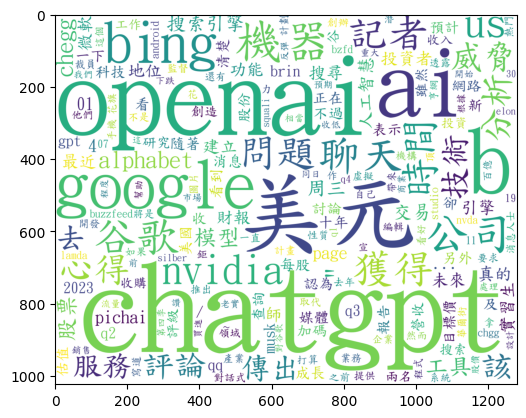

In [ ]:
dict_text = dict(new_dict_jan)
cloud = WordCloud(background_color = bg, width=width, height=height, font_path=myfont).generate_from_frequencies(dict_text)

plt.imshow(cloud)

## ---Feb---

In [ ]:
Content_LibTime = Strcontent_col_feb
word_result = [item for sublist in having_GPT_feb for item in sublist]
#print(word_result)
text = ' '.join(word_result)

# Compute TF
stat_dict = {}

for token in word_result:
    if token in str_ann :
        continue
    if token in stat_dict:
        stat_dict[token] = stat_dict[token] + 1
    else:
        stat_dict[token] = 1

new_dict = sorted(stat_dict.items(), key=lambda item: item[1], reverse=True)
print('只依TF排序', '-'*50)
print(new_dict)

只依TF排序 --------------------------------------------------
[('chatgpt', 86), ('ai', 85), ('人工智慧', 32), ('晶片', 26), ('/', 26), ('微軟', 23), ('bing', 22), ('應用', 21), ('公司', 21), ('機器', 20), ('google', 20), ('--', 18), ('時間', 18), ('搜尋', 17), ('聊天', 16), ('投資', 16), ('科技', 16), ('引擎', 15), ('工具', 14), ('軟體', 13), ('openai', 13), ('分析', 13), ('相關', 13), ('去', 13), ('運算', 12), ('甚至', 12), ('未來', 12), ('現在', 12), ('看', 12), ('設計', 11), ('話', 11), ('需要', 11), ('需求', 11), ('服務', 11), ('10', 11), ('表示', 11), ('人類', 11), ('問題', 11), ('中國', 10), ('發展', 10), ('法人', 10), ('能', 10), ('今年', 10), ('受惠', 10), ('用', 10), ('2023', 9), ('aigc', 9), ('市場', 9), ('把', 9), ('年', 9), ('網路', 9), ('答案', 9), ('記者', 8), ('研發', 8), ('資訊', 8), ('伺服器', 8), ('創意', 8), ('月', 8), ('推出', 8), ('還是', 8), ('雲端', 8), ('技術', 8), ('心得', 8), ('評論', 8), ('找', 8), ('提供', 8), ('02', 7), (':', 7), ('microsoft', 7), ('及', 7), ('處', 7), ('理器', 7), ('資料', 7), ('中心', 7), ('新', 7), ('大', 7), ('企業', 7), ('！', 7), ('再', 7), ('概念股', 7), ('另

In [ ]:
# Compute IDF
corpus_list = [Strcontent_col_jan, Strcontent_col_feb, Strcontent_col_mar, Strcontent_col_apr]

idf_dict={}
N=len(corpus_list)
for key in stat_dict:
    count=0
    
    for sen in corpus_list:
        if key in sen.split():
            count=count+1
        idf_dict[key]= math.log10(N / (float(count) + 1))

print('只依IDF排序', '-'*50)
new_dict = sorted(idf_dict.items(), key=lambda item: item[1], reverse=True)
print(new_dict)

只依IDF排序 --------------------------------------------------
[('chatgpt', 0.6020599913279624), ('加速', 0.6020599913279624), ('ai', 0.6020599913279624), ('晶片', 0.6020599913279624), ('運算', 0.6020599913279624), ('美台握', 0.6020599913279624), ('關鍵', 0.6020599913279624), ('卡中國', 0.6020599913279624), ('脖子', 0.6020599913279624), ('02', 0.6020599913279624), ('27', 0.6020599913279624), ('09', 0.6020599913279624), ('21', 0.6020599913279624), ('迌', 0.6020599913279624), ('丰', 0.6020599913279624), ('〞', 0.6020599913279624), ('記者', 0.6020599913279624), ('鍾', 0.6020599913279624), ('榮峰', 0.6020599913279624), ('台北', 0.6020599913279624), ('日電', 0.6020599913279624), ('聊天', 0.6020599913279624), ('機器', 0.6020599913279624), ('掀起', 0.6020599913279624), ('熱潮', 0.6020599913279624), ('半導體', 0.6020599913279624), ('能力', 0.6020599913279624), ('成關鍵', 0.6020599913279624), ('美商', 0.6020599913279624), ('台廠', 0.6020599913279624), ('主導', 0.6020599913279624), ('階', 0.6020599913279624), ('供應', 0.6020599913279624), ('儘', 0.6020

In [ ]:
# Compute TF-IDF
tfidf_dict = {}

for key in stat_dict:
    tfidf_dict[key] = stat_dict[key]*idf_dict[key]

new_dict_feb = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)
print('依TF-IDF排序', '-'*50)
print(new_dict_feb)

依TF-IDF排序 --------------------------------------------------
[('chatgpt', 51.77715925420477), ('ai', 51.175099262876806), ('晶片', 15.653559774527022), ('bing', 13.245319809215173), ('應用', 12.64325981788721), ('機器', 12.041199826559248), ('google', 12.041199826559248), ('時間', 10.837079843903323), ('搜尋', 10.23501985257536), ('聊天', 9.632959861247398), ('人工智慧', 9.632959861247398), ('科技', 9.632959861247398), ('引擎', 9.030899869919436), ('工具', 8.428839878591473), ('軟體', 7.826779887263511), ('openai', 7.826779887263511), ('分析', 7.826779887263511), ('相關', 7.826779887263511), ('去', 7.826779887263511), ('運算', 7.224719895935548), ('甚至', 7.224719895935548), ('未來', 7.224719895935548), ('現在', 7.224719895935548), ('看', 7.224719895935548), ('設計', 6.622659904607587), ('話', 6.622659904607587), ('需要', 6.622659904607587), ('需求', 6.622659904607587), ('服務', 6.622659904607587), ('人類', 6.622659904607587), ('問題', 6.622659904607587), ('公司', 6.321629908943605), ('中國', 6.020599913279624), ('發展', 6.020599913279624), 

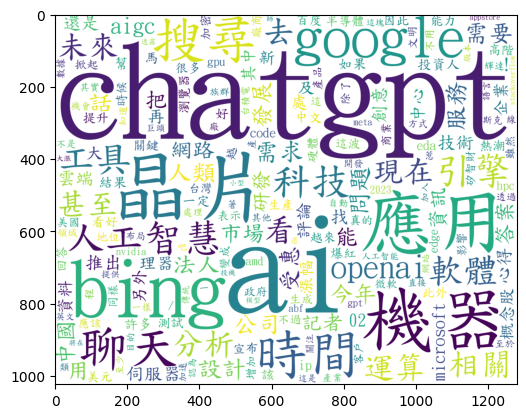

In [ ]:
dict_text = dict(new_dict_feb)
cloud = WordCloud(background_color = bg, width=width, height=height, font_path=myfont).generate_from_frequencies(dict_text)

plt.imshow(cloud)

## --Mar---

In [ ]:
Content_LibTime = Strcontent_col_mar
word_result = [item for sublist in having_GPT_mar for item in sublist]
#print(word_result)
text = ' '.join(word_result)

# Compute TF
stat_dict = {}

for token in word_result:
    if token in str_ann :
        continue
    if token in stat_dict:
        stat_dict[token] = stat_dict[token] + 1
    else:
        stat_dict[token] = 1

new_dict = sorted(stat_dict.items(), key=lambda item: item[1], reverse=True)
print('只依TF排序', '-'*50)
print(new_dict)

只依TF排序 --------------------------------------------------
[('ai', 41), ('chatgpt', 40), ('b', 22), ('openai', 18), ('文心', 15), ('微軟', 14), ('百度', 13), ('nvidia', 12), ('公司', 12), ('日', 12), ('模型', 12), ('蘋果', 12), ('/', 11), ('月', 11), ('推出', 11), ('需求', 10), (':', 10), ('時間', 9), ('受惠', 9), ('機器', 9), ('api', 9), ('記者', 8), ('心得', 8), ('提供', 8), ('能', 8), ('應用', 8), ('言', 8), ('一', 8), ('汽車', 8), ('旺矽', 7), ('評論', 7), ('gpu', 7), ('美元', 7), ('1', 7), ('4', 7), ('...', 7), ('16', 7), ('科技', 7), ('產業', 7), ('今年', 6), ('相關', 6), ('半導體', 6), ('--', 6), ('電腦', 6), ('聊天', 6), ('azure', 6), ('訓練', 6), ('2', 6), ('其他', 6), ('生成式', 6), ('或', 6), ('產品', 6), ('智慧', 6), ('ky', 6), ('可望', 5), ('新', 5), ('技術', 5), ('年', 5), ('客戶', 5), ('大型', 5), ('投資', 5), ('正式', 5), ('全球', 5), ('必須', 5), ('商業', 5), ('中文', 5), ('不過', 5), ('開放', 5), ('發展', 5), ('手', 5), ('錶', 5), ('文字', 5), ('概念股', 4), ('2023', 4), ('業界', 4), ('部分', 4), ('測試', 4), ('持續', 4), ('新高', 4), ('去年', 4), ('營收', 4), ('甚至', 4), ('大', 4), ('超級

In [ ]:
# Compute IDF
corpus_list = [Strcontent_col_jan, Strcontent_col_feb, Strcontent_col_mar, Strcontent_col_apr]

idf_dict={}
N=len(corpus_list)
for key in stat_dict:
    count=0
    for sen in corpus_list:
        if key in sen.split():
            count=count+1
        idf_dict[key]= math.log10(N / (float(count) + 1))

print('只依IDF排序', '-'*50)
new_dict = sorted(idf_dict.items(), key=lambda item: item[1], reverse=True)
print(new_dict)

只依IDF排序 --------------------------------------------------
[('chatgpt', 0.6020599913279624), ('夯', 0.6020599913279624), ('旺', 0.6020599913279624), ('矽傳', 0.6020599913279624), ('直接', 0.6020599913279624), ('打進', 0.6020599913279624), ('nvidia', 0.6020599913279624), ('供應', 0.6020599913279624), ('躋身', 0.6020599913279624), ('ai', 0.6020599913279624), ('概念股', 0.6020599913279624), ('時間', 0.6020599913279624), ('21', 0.6020599913279624), ('記者', 0.6020599913279624), ('當紅', 0.6020599913279624), ('正值', 0.6020599913279624), ('召開', 0.6020599913279624), ('gtc', 0.6020599913279624), ('業界', 0.6020599913279624), ('傳出', 0.6020599913279624), ('旺矽', 0.6020599913279624), ('6223', 0.6020599913279624), ('躍升', 0.6020599913279624), ('本業', 0.6020599913279624), ('表現', 0.6020599913279624), ('部分', 0.6020599913279624), ('hpc', 0.6020599913279624), ('新款', 0.6020599913279624), ('高階測試', 0.6020599913279624), ('需求', 0.6020599913279624), ('訂單', 0.6020599913279624), ('強勁', 0.6020599913279624), ('今年', 0.6020599913279624), ('

In [ ]:
# Compute TF-IDF
tfidf_dict = {}

for key in stat_dict:
    tfidf_dict[key] = stat_dict[key]*idf_dict[key]

new_dict_mar = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)
print('依TF-IDF排序', '-'*50)
print(new_dict_mar)

依TF-IDF排序 --------------------------------------------------
[('ai', 24.68445964444646), ('chatgpt', 24.082399653118497), ('b', 13.245319809215173), ('openai', 10.837079843903323), ('文心', 9.030899869919436), ('百度', 7.826779887263511), ('nvidia', 7.224719895935548), ('模型', 7.224719895935548), ('蘋果', 7.224719895935548), ('推出', 6.622659904607587), ('需求', 6.020599913279624), ('時間', 5.418539921951662), ('受惠', 5.418539921951662), ('機器', 5.418539921951662), ('api', 5.418539921951662), ('記者', 4.816479930623699), ('心得', 4.816479930623699), ('能', 4.816479930623699), ('應用', 4.816479930623699), ('言', 4.816479930623699), ('一', 4.816479930623699), ('汽車', 4.816479930623699), ('旺矽', 4.214419939295737), ('評論', 4.214419939295737), ('gpu', 4.214419939295737), ('美元', 4.214419939295737), ('4', 4.214419939295737), ('...', 4.214419939295737), ('16', 4.214419939295737), ('科技', 4.214419939295737), ('產業', 4.214419939295737), ('今年', 3.612359947967774), ('相關', 3.612359947967774), ('公司', 3.612359947967774), ('半導體'

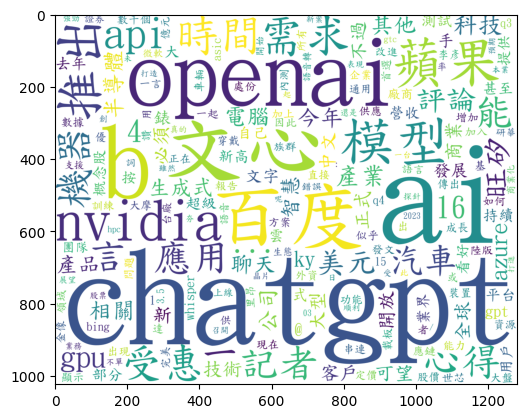

In [ ]:
dict_text = dict(new_dict_mar)
cloud = WordCloud(background_color = bg, width=width, height=height, font_path=myfont).generate_from_frequencies(dict_text)

plt.imshow(cloud)

## ---Apr---

In [ ]:
Content_LibTime = Strcontent_col_apr
word_result = [item for sublist in having_GPT_apr for item in sublist]
#print(word_result)
text = ' '.join(word_result)

# Compute TF
stat_dict = {}

for token in word_result:
    if token in str_ann :
        continue
    if token in stat_dict:
        stat_dict[token] = stat_dict[token] + 1
    else:
        stat_dict[token] = 1

new_dict = sorted(stat_dict.items(), key=lambda item: item[1], reverse=True)
print('只依TF排序', '-'*50)
print(new_dict)

只依TF排序 --------------------------------------------------
[('ai', 41), ('chatgpt', 40), ('b', 22), ('openai', 18), ('文心', 15), ('微軟', 14), ('百度', 13), ('nvidia', 12), ('公司', 12), ('日', 12), ('模型', 12), ('蘋果', 12), ('/', 11), ('月', 11), ('推出', 11), ('需求', 10), (':', 10), ('時間', 9), ('受惠', 9), ('機器', 9), ('api', 9), ('記者', 8), ('心得', 8), ('提供', 8), ('能', 8), ('應用', 8), ('言', 8), ('一', 8), ('汽車', 8), ('旺矽', 7), ('評論', 7), ('gpu', 7), ('美元', 7), ('1', 7), ('4', 7), ('...', 7), ('16', 7), ('科技', 7), ('產業', 7), ('今年', 6), ('相關', 6), ('半導體', 6), ('--', 6), ('電腦', 6), ('聊天', 6), ('azure', 6), ('訓練', 6), ('2', 6), ('其他', 6), ('生成式', 6), ('或', 6), ('產品', 6), ('智慧', 6), ('ky', 6), ('可望', 5), ('新', 5), ('技術', 5), ('年', 5), ('客戶', 5), ('大型', 5), ('投資', 5), ('正式', 5), ('全球', 5), ('必須', 5), ('商業', 5), ('中文', 5), ('不過', 5), ('開放', 5), ('發展', 5), ('手', 5), ('錶', 5), ('文字', 5), ('概念股', 4), ('2023', 4), ('業界', 4), ('部分', 4), ('測試', 4), ('持續', 4), ('新高', 4), ('去年', 4), ('營收', 4), ('甚至', 4), ('大', 4), ('超級

In [ ]:
# Compute IDF
corpus_list = [Strcontent_col_jan, Strcontent_col_feb, Strcontent_col_mar, Strcontent_col_apr]

idf_dict={}
N=len(corpus_list)
for key in stat_dict:
    count=0
    for sen in corpus_list:
        if key in sen.split():
            count=count+1
        idf_dict[key]= math.log10(N / (float(count) + 1))

print('只依IDF排序', '-'*50)
new_dict = sorted(idf_dict.items(), key=lambda item: item[1], reverse=True)
print(new_dict)

只依IDF排序 --------------------------------------------------
[('chatgpt', 0.6020599913279624), ('夯', 0.6020599913279624), ('旺', 0.6020599913279624), ('矽傳', 0.6020599913279624), ('直接', 0.6020599913279624), ('打進', 0.6020599913279624), ('nvidia', 0.6020599913279624), ('供應', 0.6020599913279624), ('躋身', 0.6020599913279624), ('ai', 0.6020599913279624), ('概念股', 0.6020599913279624), ('時間', 0.6020599913279624), ('21', 0.6020599913279624), ('記者', 0.6020599913279624), ('當紅', 0.6020599913279624), ('正值', 0.6020599913279624), ('召開', 0.6020599913279624), ('gtc', 0.6020599913279624), ('業界', 0.6020599913279624), ('傳出', 0.6020599913279624), ('旺矽', 0.6020599913279624), ('6223', 0.6020599913279624), ('躍升', 0.6020599913279624), ('本業', 0.6020599913279624), ('表現', 0.6020599913279624), ('部分', 0.6020599913279624), ('hpc', 0.6020599913279624), ('新款', 0.6020599913279624), ('高階測試', 0.6020599913279624), ('需求', 0.6020599913279624), ('訂單', 0.6020599913279624), ('強勁', 0.6020599913279624), ('今年', 0.6020599913279624), ('

In [ ]:
# Compute TF-IDF
tfidf_dict = {}

for key in stat_dict:
    tfidf_dict[key] = stat_dict[key]*idf_dict[key]

new_dict_apr = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)
print('依TF-IDF排序', '-'*50)
print(new_dict_apr)

依TF-IDF排序 --------------------------------------------------
[('ai', 24.68445964444646), ('chatgpt', 24.082399653118497), ('b', 13.245319809215173), ('openai', 10.837079843903323), ('文心', 9.030899869919436), ('百度', 7.826779887263511), ('nvidia', 7.224719895935548), ('模型', 7.224719895935548), ('蘋果', 7.224719895935548), ('推出', 6.622659904607587), ('需求', 6.020599913279624), ('時間', 5.418539921951662), ('受惠', 5.418539921951662), ('機器', 5.418539921951662), ('api', 5.418539921951662), ('記者', 4.816479930623699), ('心得', 4.816479930623699), ('能', 4.816479930623699), ('應用', 4.816479930623699), ('言', 4.816479930623699), ('一', 4.816479930623699), ('汽車', 4.816479930623699), ('旺矽', 4.214419939295737), ('評論', 4.214419939295737), ('gpu', 4.214419939295737), ('美元', 4.214419939295737), ('4', 4.214419939295737), ('...', 4.214419939295737), ('16', 4.214419939295737), ('科技', 4.214419939295737), ('產業', 4.214419939295737), ('今年', 3.612359947967774), ('相關', 3.612359947967774), ('公司', 3.612359947967774), ('半導體'

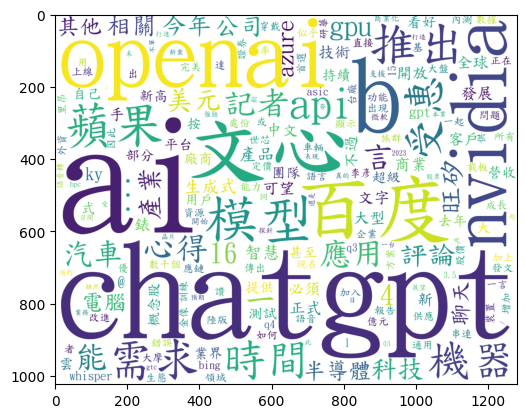

In [ ]:
dict_text = dict(new_dict_apr)
cloud = WordCloud(background_color = bg, width=width, height=height, font_path=myfont).generate_from_frequencies(dict_text)

plt.imshow(cloud)

In [ ]:
all_keywords = {}
filtered_keywords = {}
filtered_keywords_above_5 = {}

for month_index, lst in enumerate([new_dict_jan, new_dict_feb, new_dict_mar, new_dict_apr]):
    for item in lst:
        keyword = item[0]
        value = item[1]
        
        if keyword not in all_keywords:
            all_keywords[keyword] = [None, None, None, None]  
        all_keywords[keyword][month_index] = value 

for keyword, values in all_keywords.items():
    if None not in values:
        filtered_keywords[keyword] = values

for keyword, values in filtered_keywords.items():
    if all(value >= 5 for value in values):
        filtered_keywords_above_5[keyword] = values

print(filtered_keywords)
print(filtered_keywords_above_5)

{'chatgpt': [25.888579627102384, 51.77715925420477, 24.082399653118497, 24.082399653118497], 'openai': [19.265919722494797, 7.826779887263511, 10.837079843903323, 10.837079843903323], 'ai': [13.847379800543136, 51.175099262876806, 24.68445964444646, 24.68445964444646], '美元': [13.847379800543136, 3.612359947967774, 4.214419939295737, 4.214419939295737], 'b': [13.245319809215173, 0.6020599913279624, 13.245319809215173, 13.245319809215173], 'bing': [8.428839878591473, 13.245319809215173, 1.806179973983887, 1.806179973983887], '機器': [6.020599913279624, 12.041199826559248, 5.418539921951662, 5.418539921951662], '公司': [5.11750992628768, 6.321629908943605, 3.612359947967774, 3.612359947967774], '聊天': [4.816479930623699, 9.632959861247398, 3.612359947967774, 3.612359947967774], '谷歌': [4.816479930623699, 1.2041199826559248, 0.6020599913279624, 0.6020599913279624], '獲得': [4.214419939295737, 1.2041199826559248, 0.6020599913279624, 0.6020599913279624], '記者': [4.214419939295737, 4.816479930623699, 

In [ ]:
df = pd.DataFrame(filtered_keywords)
df = df.T
df.columns = ['Jan','Feb','Mar','Apr']
df

,Jan,Feb,Mar,Apr
chatgpt,25.88858,51.777159,24.08240,24.08240
openai,19.26592,7.826780,10.83708,10.83708
ai,13.84738,51.175099,24.68446,24.68446
美元,13.84738,3.612360,4.21442,4.21442
b,13.24532,0.602060,13.24532,13.24532
...,...,...,...,...
月,0.00000,0.000000,0.00000,0.00000
年,0.00000,0.000000,0.00000,0.00000
2022,0.00000,0.000000,0.00000,0.00000
2021,0.00000,0.000000,0.00000,0.00000


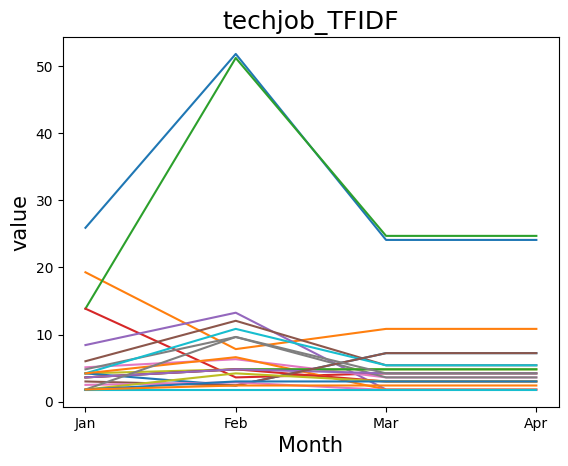

In [ ]:
x_label =  ['Jan','Feb','Mar','Apr']
x = range(len(x_label))
'''
for i in filtered_keywords_above_5.keys():
  plt.plot(x,filtered_keywords_above_5[i], label = 'i')
'''
for i in filtered_keywords.keys():
    values = filtered_keywords[i]
    if all(value >= 1.6 for value in values):
      plt.plot(x,filtered_keywords[i], label = 'i')

plt.xlabel('Month', fontsize="15")
plt.xticks(x,x_label)
plt.ylabel('value', fontsize="15")
plt.title('techjob_TFIDF',fontsize="18")
plt.show()

In [ ]:
for i in filtered_keywords.keys():
    values = filtered_keywords[i]
    if all(value >= 1.6 for value in values):
      print(i,values)

chatgpt [25.888579627102384, 51.77715925420477, 24.082399653118497, 24.082399653118497]
openai [19.265919722494797, 7.826779887263511, 10.837079843903323, 10.837079843903323]
ai [13.847379800543136, 51.175099262876806, 24.68445964444646, 24.68445964444646]
美元 [13.847379800543136, 3.612359947967774, 4.214419939295737, 4.214419939295737]
bing [8.428839878591473, 13.245319809215173, 1.806179973983887, 1.806179973983887]
機器 [6.020599913279624, 12.041199826559248, 5.418539921951662, 5.418539921951662]
公司 [5.11750992628768, 6.321629908943605, 3.612359947967774, 3.612359947967774]
聊天 [4.816479930623699, 9.632959861247398, 3.612359947967774, 3.612359947967774]
記者 [4.214419939295737, 4.816479930623699, 4.816479930623699, 4.816479930623699]
時間 [4.214419939295737, 10.837079843903323, 5.418539921951662, 5.418539921951662]
nvidia [4.214419939295737, 2.4082399653118496, 7.224719895935548, 7.224719895935548]
問題 [4.214419939295737, 6.622659904607587, 1.806179973983887, 1.806179973983887]
心得 [3.6123599